In [1]:
import nltk
from nltk.tokenize import sent_tokenize

In [3]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [6]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [13]:
emma_raw = nltk.corpus.gutenberg.raw('austen-emma.txt')

In [14]:
emma_raw[:1302]

"[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.\n\nShe was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.  Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.\n\nSixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.  Between _them_ it was more the intimacy\nof sisters.  Even before Miss Taylor had ceased to hold the nominal\noffice of 

In [17]:
emma_raw[0]

'['

In [26]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer#글자만 가져오게하는 정규식 사용
from nltk.stem import PorterStemmer, LancasterStemmer#어간 분리 역할
from nltk.stem import WordNetLemmatizer#단어의 원형찾기
from nltk.tag import pos_tag#품사
from nltk import FreqDist#빈도수
import matplotlib.pyplot as plt#그래프 그려보기
from wordcloud import WordCloud#워드클라우드로 그래프 그리기

In [ ]:
# 형태소 분석
# 형태소(morpheme)는 언어학에서 일정한 의미가 있는 가장 작은 말의 단위를 뜻한다. 
# 보통 자연어 처리에서는 토큰으로 형태소를 이용한다. 
# 형태소 분석(morphological analysis)이란 단어로부터 어근, 접두사, 접미사, 품사 등 다양한 언어적 속성을 파악하고 이를 이용하여 형태소를 찾아내거나 처리하는 작업이다. 
# 형태소 분석의 예로는 다음과 같은 작업이 있다.

  # 어간 추출(stemming)
  # 원형 복원(lemmatizing)
  # 품사 부착(Part-Of-Speech tagging)

In [22]:
print(sent_tokenize(emma_raw[:1000])[0])
#천개의 글자들을 문장으로 끊어보고 0번째 한문장 가져오기.

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.


In [24]:
print(sent_tokenize(emma_raw[:1000])[1])#한문장 가져오기.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.


In [27]:
#단어를 끊어보자!
word_tokenize(emma_raw[50:100])
#쉼표까지 문자로 인식하는 것을 확인!

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [28]:
#문자가 아니면 가져오지 않게 처리하기(쉼표는 필요없으니까)

In [29]:
from nltk.tokenize import RegexpTokenizer

In [30]:
retokenize = RegexpTokenizer("[\w]+")
#\w=글자만(한개), [\w]+ = 글자들만 가져오게하기.
retokenize.tokenize(emma_raw[50:100])#emma_raw에서 글자들만 추출!! 

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

In [31]:
from nltk.stem import PorterStemmer, LancasterStemmer

In [33]:
st1 = PorterStemmer()
st2 = LancasterStemmer()

In [34]:
#어간을 분리해보자!!  # 어간 추출(stemming)
#for문을 돌려서 words에서 1개씩 꺼내서 st1.stem(w)어간을 분리해서 w에 넣어줘.
words = ["fly", "flies", "flying", "flew", "flown"]
print("Porter Stemmer   :", [st1.stem(w) for w in words])
print("Lancaster Stemmer:", [st2.stem(w) for w in words])

Porter Stemmer   : ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer: ['fly', 'fli', 'fly', 'flew', 'flown']


In [35]:
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()

[lm.lemmatize(w, pos="v") for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

In [36]:
from nltk.tag import pos_tag
sentence = "Emma refused to permit us to obtain the refuse permit"

In [38]:
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [39]:
from nltk import Text

text = Text(retokenize.tokenize(emma_raw))

In [41]:
text

<Text: Emma by Jane Austen 1816 VOLUME I CHAPTER...>

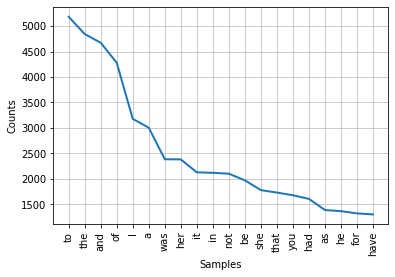

In [56]:
text.plot(20)

In [44]:
text.concordance('Emma')#Emma를 기준으로 양 옆에 어떤 단어가 나왔는지 보여줌.

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

In [45]:
text.similar('Emma')#Emma와 함께 자주 등장하는 단어들

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [47]:
text.common_contexts(['Emma','she'])#Emma,she와 함께 자주 등장하는 단어들

but_was and_could that_should said_and which_could whom_knew
which_particularly and_imagined that_could said_i that_began
and_thought do_was but_could than_had said_but manner_was this_could
as_saw possible_could


In [48]:
from nltk import FreqDist

In [49]:
emma_tokens = pos_tag(retokenize.tokenize(emma_raw))

In [50]:
emma_tokens

[('Emma', 'NN'),
 ('by', 'IN'),
 ('Jane', 'NNP'),
 ('Austen', 'NNP'),
 ('1816', 'CD'),
 ('VOLUME', 'NNP'),
 ('I', 'PRP'),
 ('CHAPTER', 'VBP'),
 ('I', 'PRP'),
 ('Emma', 'NNP'),
 ('Woodhouse', 'NNP'),
 ('handsome', 'VBD'),
 ('clever', 'NN'),
 ('and', 'CC'),
 ('rich', 'JJ'),
 ('with', 'IN'),
 ('a', 'DT'),
 ('comfortable', 'JJ'),
 ('home', 'NN'),
 ('and', 'CC'),
 ('happy', 'JJ'),
 ('disposition', 'NN'),
 ('seemed', 'VBD'),
 ('to', 'TO'),
 ('unite', 'VB'),
 ('some', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('blessings', 'NNS'),
 ('of', 'IN'),
 ('existence', 'NN'),
 ('and', 'CC'),
 ('had', 'VBD'),
 ('lived', 'VBN'),
 ('nearly', 'RB'),
 ('twenty', 'JJ'),
 ('one', 'CD'),
 ('years', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('with', 'IN'),
 ('very', 'RB'),
 ('little', 'JJ'),
 ('to', 'TO'),
 ('distress', 'VB'),
 ('or', 'CC'),
 ('vex', 'VB'),
 ('her', 'PRP$'),
 ('She', 'PRP'),
 ('was', 'VBD'),
 ('the', 'DT'),
 ('youngest', 'JJS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('

In [59]:
stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear","and","to","of","I","a","with"]


In [60]:
emma_token2 = [w[0] for w in emma_tokens if w[1] == "NNP" and w[0] not in stopwords]
#w는 튜플형태('Woodhouse', 'NNP')=(단어명, 품사)
#w[0]는 단어가 stopwords에 없는 단어만
#w[1]은 품사 "NNP" 품사가 명사만

In [61]:
emma_token2

['Jane',
 'Austen',
 'VOLUME',
 'Emma',
 'Woodhouse',
 'Sixteen',
 'Taylor',
 'Woodhouse',
 'Emma',
 'Between',
 'Taylor',
 'Emma',
 'Taylor',
 'Emma',
 'Sorrow',
 'Taylor',
 'Taylor',
 'Emma',
 'Weston',
 'Taylor',
 'A',
 'Isabella',
 'How',
 'Emma',
 'Weston',
 'Taylor',
 'Woodhouse',
 'Her',
 'London',
 'October',
 'November',
 'Hartfield',
 'Christmas',
 'Isabella',
 'Highbury',
 'Hartfield',
 'Taylor',
 'Emma',
 'Matrimony',
 'Taylor',
 'Taylor',
 'Hartfield',
 'Emma',
 'Poor',
 'Taylor',
 'Weston',
 'Weston',
 'Taylor',
 'A',
 'How',
 'Randalls',
 'No',
 'James',
 'Weston',
 'Weston',
 'James',
 'Randalls',
 'Hannah',
 'Nobody',
 'Hannah',
 'James',
 'James',
 'Whenever',
 'Taylor',
 'Whenever',
 'James',
 'Emma',
 'Knightley',
 'Isabella',
 'Highbury',
 'London',
 'Hartfield',
 'Brunswick',
 'Square',
 'Woodhouse',
 'Knightley',
 'Isabella',
 'Woodhouse',
 'Knightley',
 'Dirty',
 'Look',
 'Well',
 'Who',
 'Ah',
 'Taylor',
 'Tis',
 'Poor',
 'Woodhouse',
 'Taylor',
 'Emma',
 'Emma

In [62]:
fd_names = FreqDist(emma_token2)
fd_names

FreqDist({'Emma': 830, 'Harriet': 491, 'Weston': 439, 'Knightley': 389, 'Elton': 385, 'Woodhouse': 304, 'Jane': 299, 'Fairfax': 241, 'Churchill': 223, 'Frank': 208, ...})

In [64]:
fd_names.most_common(10)#자주 등장하는 단어 순위

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385),
 ('Woodhouse', 304),
 ('Jane', 299),
 ('Fairfax', 241),
 ('Churchill', 223),
 ('Frank', 208)]

In [54]:
!pip install wordcloud

In [58]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

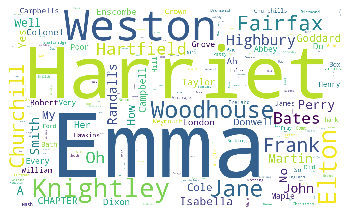

In [67]:
wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))#.imshow=그래프 그려줘
plt.axis("off")#축 안보이게 설정
plt.show()

In [68]:
import pandas as pd
import numpy as np

# 주요 라이브러리 import
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
from sklearn.datasets import fetch_openml
import sklearn.datasets as data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#라벨인코더 임포트
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from pandas.plotting import parallel_coordinates#코디네이츠 그래프 그릴 때 필요한 라이브러리
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier#모델링 중 하나
#cross_val_score: 다양한 셈플링을 해서 여러번 테스트-->평균치를 구해본다.
from sklearn.model_selection import cross_val_score#crossvaludation해주는거
from sklearn.metrics import *# MSE,MSA등 다 들어있음.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # 폰트 관련 용도

from sklearn.model_selection import GridSearchCV#그리드서치
from sklearn.preprocessing import StandardScaler #표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler # 정규화(정해진 규칙 기준, mix-max기준)
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
#앙상블
from sklearn.ensemble import VotingClassifier
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet

from sklearn.tree import DecisionTreeClassifier## tree방법론의 DecisionTreeClassifier사용
from sklearn.svm import SVC##svm방법론의 SVC사용
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.experimental import  enable_hist_gradient_boosting
from sklearn.ensemble import  HistGradientBoostingClassifier
# from lightgbm import  LGBMClassifier 코렙에는 깔려있음 주피터는 깔아야함.

In [80]:
song = """
15 Songs That Directly Address Mental Health, From The Beatles To Ariana Grande To 'Encanto'
If it's a cliché that we're freer to discuss mental-health struggles than ever before, so be it: it's an often lifesaving development. While there has been a recent preponderance of mental health songs, here are selections from across the decades.

MORGAN ENOS
|
GRAMMYS
/
MAY 3, 2022 - 06:57 AM
As long as there have been humans, there has been music — as well as mental illness. Thereby, people must have been singing about it since the beginning, right?

Sure. But music's an abstract, poetic artform, so the topic usually isn't approached literally. That's why Hank Williams wrote "I'm So Lonesome I Could Cry," not "I'm Depressed And Also An Alcoholic." And why the Rolling Stones called it "Paint It, Black," not "Wantonly Projecting My Trauma."

So, what does that mean for mental illness and the history of popular music? That delineations aren't always neat and tidy. That's why GRAMMY.com prepared a list of songs that address psychological maladies, more-or-less directly.

Obviously, it's not exhaustive — how could a list that leaves out all pre-1968 music be? Plus, It's not like these tunes have to reference the DSM-5 — it's that, to make the cut, they should touch on anxiety, depression, addiction, PTSD, and other conditions without too many buffering layers.

With that in mind, here are 15 songs from across the decades that got real about the realities of mental illness, and how to overcome it.


The Beatles, "Yer Blues" (1968)
After years of freewheeling experimentation in the studio, the Fabs finally jammed out in a room together. Eyeball-to-eyeball, they recorded "Yer Blues," John Lennon's 12-bar cry for help from the White Album.

Never before or since — not even on 1970's shockingly confessional Plastic Ono Band — had he been this candid about suicidal depression in a song. And more than half a century later, "Yer Blues" remains bracing, cathartic and strangely giddy.

Read More: Now That I Showed You What I Been Through: 50 Years Of John Lennon/Plastic Ono Band


Bill Fay, "Be Not So Fearful" (1970)
Skip the string-swelling version from Bill Fay's self-titled debut and seek out the stripped-down demo, found on From The Bottom of An Old Grandfather Clock. What you'll hear is a pocket-sized hymn for when the enemy within has you on the ropes.

"Someone watches you," the English singer/songwriter promises, "you will not leave the rails." A rare thing: a convincing argument against anxiety, and a song of honest-to-goodness utility.


Daniel Johnston, "Peek a Boo" (1982)
Throughout his long, unconventional career until his untimely death in 2019, singer/songwriter Daniel Johnston unflinchingly detailed his hopes, longings and fears in his rough-hewn music — as well as his struggles with bipolar disorder and schizophrenia.

His songbook is littered with sometimes harrowing songs about the latter, but "Peek a Boo" sums it up: "I'm tired from being kidnapped by a dark wolf that would do me in."


Swans, "God Damn the Sun" (1989)
While mostly known for skull-rattling noise jams and symphony scale indie rock, Swans have at least one unforgettable acoustic ballad. 

The majestic, doomed "God Damn the Sun" isn't just worthy of Leonard Cohen — because of leader Michael Gira's unvarnished language, it arguably surpasses even the Godfather of Goth's sense of despair. 

"I've got one thing to say before I am drunk again," Gira seethes, before condemning life on Earth — all of it. But he made it through, and so can all of us. And when we're in the depths of sorrow articulated in "God Damn the Sun," sometimes pitch-black commiseration feels paradoxically healing.


Bob Dylan, "Not Dark Yet" (1997)
Less theatrical than "God Damn the Sun" yet no less unequivocal about depression, this late-period masterpiece from Time Out of Mind is the soundtrack to self-inventory deep into the night.

"Every nerve in my body is so naked and numb," Uncle Bob sings over a gorgeous soundscape by producer Daniel Lanois, sounding depleted and discouraged. "I can't even remember what it was I came here to get away from."

What a monument to a universal facet of the human condition — a fearsome enemy, but not one that has to consume us.


Sia, "Breathe Me" (2004)
Sia's "Breathe Me" feels like a continuation of Nine Inch Nails' (and Johnny Cash's) classic "Hurt" — only left off this list due to its ubiquity — thanks to its opening lines. 

"Help, I have done it again/ I have been here many times before," she sings. "Hurt myself again today/ And, the worst part is there's no one else to blame."

Hung on piano and a hangdog string section, "Breathe Me" is a dispatch about despair and vulnerability that belongs on a shelf with the best of them.


Amy Winehouse, "Wake Up Alone" (2006)
Sadly, the wildly talented Amy Winehouse didn't win her battle against drug and alcohol addiction — alcohol poisoning got her at only 27.

But she left behind a monster body of work — including her breakthrough album Back to Black, which garnered her a whopping five GRAMMYs.

Over a doo-wop rhythm and stabbing chords, "Wake Up Alone" is both a love song and a gripping expression of crepuscular loneliness and discontent. "That silent sense of content that everyone gets," Winehouse sings, "Just disappears soon as the sun sets."


Paramore, "Fake Happy" (2017)
The juxtaposition of crestfallen lyrics with a sparkling melody is the heart of power-pop — and by extension, pop-punk and alternative rock. And Paramore, who's been at the vanguard of both subgenres for almost 20 years, blends these qualities masterfully.

"Fake Happy," an inspired single from After Laughter, captures the feeling of feigning a grin when you're down in the dumps. "If I go out tonight, dress up my fears," asks bandleader Hayley Williams, "you think I'll look alright with these mascara tears?"


Ariana Grande, "breathin" (2018)
Despite dealing with high-profile breakups and PTSD from horror of the Manchester Arena bombing, Ariana Grande examines her internal mechanisms with humility and magnanimity. (Just think of her immortal line: "I'm so f***ing grateful for my ex.")

"breathin," from Sweetener, is no different. "Feel my blood runnin', swear the sky's fallin'/ How do I know if this s***'s fabricated?" she asks. Grande doesn't get self-pitying or pretend to have the answers — instead, she looks to a universal human balm during throttling times.

"Just keep breathin' and breathin' and breathin' and breathin'," she sings in the hook, over and over and over — like she's telling herself to hang in there as much as us.


Jason Isbell and the 400 Unit, "It Gets Easier" (2020)
Since his Drive-By Truckers days, Jason Isbell has written like a surgeon about fundamental topics — his sociopolitical beliefs; his relationship with his wife, Amanda Shires; and his decade-plus of sobriety.

True to the current state of his recovery, "It Gets Easier" isn't about getting on the wagon, but staying on it. It begins with a "drunk dream," a common phenomenon among those sobering up. "I had one glass of wine/ I woke up feeling fine/ That's how I knew it was a dream," he sings.

Taking a cue from his friend and mentor, the late John Prine, Isbell sums up the tune in a crystalline thesis of a hook, over a kicking guitar riff: "It gets easier, but it never gets easy."


G Herbo, "PTSD" (2020)
File this one with Grande's Sweetener, which addresses the Manchester Bombing and her emotions in its wake.

While many of the entries insofar on this list deal with anxiety, depression or substance abuse, rapper G Herbo homes in on a very specific and sometimes misunderstood malady: post-traumatic stress disorder.

"I got a war zone inside of my head / I made it on my own, they said I'd be in jail or dead," he raps in "PTSD," featuring Chance the Rapper, Lil Uzi Vert and Juice WRLD. "I've seen my brothers fall over and over again / Don't stand too close to me, I got PTSD."

"I felt like people may look at my situation and my life like I don't do these things, like I don't have problems, like I don't endure pain or stress," Herbo told GRAMMY.com in 2020. "I just wanted the world to know that we all are the same."

Read More: G Herbo Talks PTSD And The Importance Of Mental Health: "People Need To Treat Mental Health More Seriously"


Francisca Valenzuela, "La Fortaleza" (2020)
"La Fortaleza" — meaning "the fortitude" or "the strength" — is an impactful statement by Chilean singer/songwriter Francisca Valenzuela about finding the resilience to go on.

"Everything that has happened has led me to today," she sings. "I look forward to the horizon/ I bury guilt and leave." But Valenzuela isn't giving up, or stepping into oblivion. She's beginning anew.

"With my pen and my poem/ I will cross the mountain range," she sings, framing artistic expression as a magical weapon for healing and self-transformation. "And if I am in the middle of the storm/ Be the calm that sustains the center of the earth."


Julia Michaels, "Anxiety" (2021)
Some measure of trepidation is necessary for survival, but full-blown anxiety warps that psychological tool — into one that can undermine our day-to-day relationships.

Singer/songwriter Julia Michaels clearly understood this while writing "Anxiety," a cut from Melancholic Mood featuring Selena Gomez. "My friends, they wanna take me to the movies," she sings. "I tell 'em to f*** off/ I'm holding hands with my depression."

"For the first year [of mass success], I was having panic attacks, I was hiding in hallways, I was running away, people couldn't find me," Michaels told Billboard in 2019. Which, she explains, is often hidden in artists behind glitzy promotional machinery.

"You don't see the photoshoots and the interviews and the flying all the time and the being away from everyone and everything you love," she continued. But thanks to "Anxiety," the entire planet saw her clearly.


Jessica Darrow, "Surface Pressure" (from Encanto) (2021)
The hit Disney flick Encanto treated viewers to a nuanced take on Latine family dynamics, and "Surface Pressure" — written by Lin-Manuel Miranda as the character Luisa's solo — captures bluster that obfuscates insecurity.

"I'm the strong one, I'm not nervous/ I'm as tough as the crust of the Earth is," it begins. But then Miranda's tune cracks that facade: "Under the surface/ I feel berserk as a tightrope walker in a three-ring circus."

The strength and incisiveness of "Surface Pressure" speaks to what makes certain Disney and Pixar films special — despite being marketed to children, they speak to universal human truths.

Read More: From Encanto To "Euphoria" And Grand Theft Auto V: Behind The Making Of A Great Soundtrack


Jimmie Allen, "Untitled Song" (2022)
Country star Jimmie Allen's trajectory may have led him to a GRAMMY nomination, but it was flecked with difficulties and hardship. Specifically, he was diagnosed with bipolar disorder as a young teen, and the isolation of the COVID-19 pandemic didn't help at all.

But Allen hasn't just come to terms with this reality — he's made it public so that he might help others in his boat. On April 19, he posted a performance of an unreleased and untitled song, about "pain [that] pulls me apart like a ripped-up floor" and feeling "always on the edge."

"I wrote this song about how I feel a lot of the time," Allen tweeted. "Mental illness is something I have struggled with my entire life."

Of course, he's far from alone. But as always, music is one of our most precious gifts to bridge those divides and forge those missing connections — and, consequently, let the light in.

Meet Question, A Rapper/Producer Who Doesn't Want To Be Boxed In By Blindness

READ LESS
WATCH: Lady Gaga And Ariana Grande Team Up For "Rain On Me"
Lady Gaga 

PHOTO: KEVIN MAZUR/GETTY IMAGES FOR HAUS LABORATORIES

Facebook
Twitter
E-mail
NEWS

WATCH: Lady Gaga And Ariana Grande Team Up For "Rain On Me"
Grande enters the "Stupid Love" singer's futuristic world as the two pop sensations dance together in an out-of-this-planet setting

JENNIFER VELEZ
|
GRAMMYS
/
MAY 23, 2020 - 07:17 AM
Lady Gaga and Ariana Grande have come together for "Rain On Me," an optimistic pop track about Gaga's personal experiences off her forthcoming album, Chromatica. 

"I can feel it on my skin (It's comin' down on me)/ Teardrops on my face (Water like misery)/ Let it wash away my sins (It's coming down on me)," the global pop stars sing together on the chorus. "I'd rather be dry, but at least I'm alive/ Rain on me, rain, rain."

The song is an empowering track about being comfortable with letting tears fall. Gaga revealed the many layers behind the song in an interview with Vulture, sharing that some of the inspiration for it came from her relationship with drinking. "This is about an analog of tears being the rain. And you know what it’s also a metaphor for, is the amount of drinking that I was doing to numb myself," she said. "I’d rather be dry. I’d rather not be drinking, but I haven’t died yet. I’m still alive. Rain on me."

She added that the song also went beyond that. "Okay, I’m going to keep on drinking. This song has many layers," she said. 

Grande enters the "Stupid Love" singer's futuristic world in the video released Friday, May 22, with the two dancing together in an out-of-this-planet setting. The video ends with them in a strong embrace.


Gaga has shared how much the collaboration with Grande means to her and thanked Grande for "reminding me I’m strong."  Before the video's release, she tweeted out a special message to the "Stuck with U" singer. 

"One time I felt like I was crying so much it would never stop. Instead of fighting it, I thought bring it on, I can do hard things. @arianagrande I love you for your strength and friendship. Let’s show them what we’ve got," she tweeted. 

Grande returned the love with more love, revealing what sharing a track with Gaga means to her.

"one time ..... i met a woman who knew pain the same way i did... who cried as much as i did, drank as much wine as i did, ate as much pasta as i did and who’s heart was bigger than her whole body. she immediately felt like a sister to me," she tweeted. "she then held my hand and invited me into the beautiful world of chromatica and together, we got to express how beautiful and healing it feels to mothafuckinnnn cry ! i hope this makes u all feel as uplifted as it does for us both. i love u @ladygaga , u stunning superwoman !"  

Watch the full video above. Chromatica is set to be released on May 29. 

Recording Academy Board Members Cover John Prine's "Angel From Montgomery" To Benefit MusiCares' COVID-19 Relief Fund


READ MORE
Ariana Grande Donates Proceeds From Atlanta Show To Planned Parenthood
Ariana Grande

PHOTO: KEVIN MAZUR/GETTY IMAGES

Facebook
Twitter
E-mail
NEWS

Ariana Grande Donates Proceeds From Atlanta Show To Planned Parenthood
"Ariana Grande's generous donation comes at a critical time—in Georgia and across the country, anti-women's health politicians are trying to ban all safe, legal abortion," Dr. Leana Wen, President of Planned Parenthood, said in a statement

ANA MONROY YGLESIAS
|
GRAMMYS
/
JUN 13, 2019 - 07:56 AM
Today, Planned Parenthood confirmed that GRAMMY winner Ariana Grande has donated the proceeds from her June 8 concert in Atlanta, around $250,000, to the reproductive health non-profit. The contribution follows several Southern states, including Georgia, passing restrictive anti-abortion bills in May.


"Ariana Grande's generous donation comes at a critical time—in Georgia and across the country, anti-women's health politicians are trying to ban all safe, legal abortion," Dr. Leana Wen, President of Planned Parenthood, said in a statement to People, who broke the news. 

Wen, who is a medical doctor and the former Baltimore City Health Commissioner, spoke to the critical timing of Grande's donation, at a time when lawmakers are rolling back years of women's rights legislation:

"This is not what the American people want, nor is it something they'll stand for. Thanks to inspiring support like hers, Planned Parenthood can continue to fight back—in the courts, in Congress, in state houses, and in the streets—against these dangerous attacks on people's health and lives. We are so grateful to Ariana for her longstanding commitment to supporting women's rights and standing with Planned Parenthood to defend access to reproductive health care. We won't stop fighting—no matter what."

Ariana Grande Shines At Coachella Alongside *NSYNC, Nicki Minaj, Diddy & Mase

As People and other outlets point out, the donation follows the singer's response to hate speech made outside of the Atlanta concert. Ari fans tweeted a video of a protester outside of the venue making homophobic, sexist and racist comments over a P.A. system to the young women. Grande commented on the post, writing: "man... saddened but not surprised by this one bit. I'm so sorry any of my fans had to encounter this. we will do our best to ensure this doesn't happen again. proud of u all for not fighting / engaging violently. never worth it. wishing him peace & a healed heart cause girl yikes."

The Atlanta show was one of the stops on the pop star's Sweetener World Tour, which continues across North America until mid-July, after which she'll headline Lollapalooza on Aug. 4, then take the tour across the pond to London on Aug. 17 for its European leg.

Travis Scott Will Donate Alabama Festival Merch Profits To Planned Parenthood

Let Freedom Ring With The March On Washington GRAMMY Playlist
Celebrate the 50th Anniversary of the March on Washington with a song

THE GRAMMYS
|
GRAMMYS
/
DEC 3, 2014 - 02:06 PM
On Aug. 28, 1963, Dr. Martin Luther King Jr. stood on the steps of the Lincoln Memorial in Washington, D.C., and declared in his landmark "I Have A Dream" speech, "Now is the time to lift our nation from the quicksands of racial injustice to the solid rock of brotherhood."

In 2012 The Recording Academy recognized King's speech for its historical significance by inducting the recording into the GRAMMY Hall Of Fame. Delivered before 250,000 people, "I Have A Dream" culminated the March on Washington for Jobs and Freedom, a rally organized by a coalition of civil rights organizations that called for the passage of meaningful civil rights legislation and a program to provide jobs, among other demands.

Several artists have used music to call for a solid rock of brotherhood and sisterly love over the years. GRAMMY winners Bob Dylan; Peter, Paul & Mary; and Mahalia Jackson were among the performers who stood beside King at the March on Washington and dared to dream of a better America. On Aug. 28 President Barack Obama — joined by fellow GRAMMY winners such as LeAnn Rimes and BeBe Winans and former Presidents Jimmy Carter and Bill Clinton — will deliver his own speech at the Let Freedom Ring Commemoration and Call to Action bell-ringing ceremony at the Lincoln Memorial, commemorating the 50th anniversary of the March on Washington.

As bells toll throughout the country, we encourage you to let freedom ring by marching to the beat of our March on Washington 50th anniversary GRAMMY playlist.

"Blowin' In The Wind"
Peter, Paul & Mary, Best Performance By A Vocal Group, Best Folk Recording, 1963; GRAMMY Hall Of Fame, inducted 2003

Peter, Paul & Mary's cover of Bob Dylan's popular protest song was one of two songs performed by the trio at the March on Washington. The two-time GRAMMY-winning track fittingly asked marchers, "How many roads must a man walk down/Before you call him a man?" The answer, of course, was blowin' in the wind.

"A Change Is Gonna Come"
Sam Cooke, GRAMMY Hall Of Fame, inducted 2000

Considered one of the defining anthems of the civil rights movement, "A Change Is Gonna Come" was released in 1964 by R&B singer Cooke as a response to Dylan's "Blowin' In The Wind." Cooke's harrowing track was voted No. 12 on Rolling Stone's 500 Greatest Songs of All Time list and epitomizes the hope and change King called for 50 years ago.                   

"Ohio"
Crosby, Stills, Nash & Young, GRAMMY Hall Of Fame, inducted 2009

Although written by Canadian Neil Young, "Ohio" spoke to the outrage many felt over the Kent State shootings in Kent, Ohio, in 1970. The song openly questioned the deaths of four unarmed students who were killed by the Ohio National Guard during a campus Vietnam War protest.   

"Get Up, Stand Up"
Bob Marley & The Wailers, GRAMMY Hall Of Fame, inducted 1999

Written by Bob Marley and Peter Tosh, this classic reggae tune was featured on the Wailers' 1973 album Burnin'. The group's signature call to action demanded people "get up, stand up/Stand up for your rights." In 1999 the track was the first reggae song to be inducted into the GRAMMY Hall Of Fame.


"Born In The U.S.A."
Bruce Springsteen, Record Of The Year nominee, 1985

Though often misinterpreted as a patriotic anthem, "Born In The U.S.A." actually speaks to the desperate flip side of the American dream encountered by some Vietnam War veterans. Still, the album of the same name garnered a GRAMMY nomination for Album Of The Year, spawned no less than seven Top 10 hits and was inducted into the GRAMMY Hall Of Fame in 2012.

"Fight The Power"
Public Enemy, Best Rap Performance nominee, 1989  

It might take a nation of millions to hold back listeners of Public Enemy's confrontational and controversial hit "Fight The Power." Chosen by director Spike Lee as the musical theme for his 1989 film Do The Right Thing, the track calls out everyone from Elvis to the American government, imploring people to "fight the powers that be."                         

"Guerrilla Radio"
Rage Against The Machine, Best Hard Rock Performance, 2000

Featured on Rage Against The Machine's 1999 GRAMMY-nominated album The Battle Of Los Angeles, "Guerrilla Radio" is the band's call to cut off the lights, turn up the radio and tune out those they describe as "vultures who thirst for blood and oil."

"Revolution 1"
The Beatles, The Beatles, GRAMMY Hall Of Fame, inducted 2000

A year before John Lennon and Yoko Ono famously held a two-week bed-in for peace in 1969, the Beatles released this Lennon/McCartney penned tune featured on The Beatles ("The White Album"). The song spoke to Lennon's skepticism about some of the radical tactics used to protest the Vietnam War, offering the tongue-in-cheek guarantee that everything was "gonna be alright."

"War"
Edwin Starr, Best R&B Vocal Performance, Male nominee, 1970

Written by Barrett Strong and Norman Whitfield in protest of the Vietnam War, "War" was originally recorded by the Temptations. Starr's version of this classic track helped him achieve legendary status on the soul circuit. His cover was intense and direct, simply stating: "I said, war, good gawd ya'll/What is it good for?/Absolutely nothing!"  

"The Times They Are A-Changin'"      
Bob Dylan, GRAMMY Hall Of Fame, inducted 2013

After the release of "Blowin' In The Wind," Dylan provided another anthemic protest song with "The Times They Are A-Changin'." Since its release in 1964, the song has been covered by artists such as the Beach Boys, Joan Baez, Phil Collins, Billy Joel, and Nina Simone, among others, during both challenging and ever-changing times.

"What The World Needs Now Is Love"
Jackie DeShannon, GRAMMY Hall Of Fame, inducted 2008

After all the protests, marches and calls for change have quieted down, arguably no song should be cranked up as loud as DeShannon's 1965 hit "What The World Needs Now Is Love." Per DeShannon: All we need "is love, sweet love/No, not just for some, but for everyone."

Know a song that changed the world? Let us know in the comments.

book
Twitter
E-mail
NEWS

Bob Dylan At Dolby Theatre
THE GRAMMYS
|
GRAMMYS
/
FEB 21, 2015 - 01:06 PM

Welcome to The Set List. Here you'll find the latest concert recaps for many of your favorite, or maybe not so favorite, artists. Our bloggers will do their best to provide you with every detail of the show, from which songs were on the set list to what the artist was wearing to which out-of-control fan made a scene. Hey, it'll be like you were there. And if you like what you read, we'll even let you know where you can catch the artist on tour. Feel free to drop us a comment and let us know your concert experience. Oh, and rock on.

By Jamie Wayt
Hollywood, Calif.

Set in the grit of Hollywood Boulevard, the Dolby Theatre, the glamourous venue that hosts the Academy Awards, is akin to an indoor Hollywood Bowl, but on a much smaller scale. A giant half-moon-shaped stage sits in front of rows of seats, with opera-style boxes hanging magically on the sides. It was perhaps the perfect place to see 2015 MusiCares Person of the Year Bob Dylan on Oct. 26.

This was my third Dylan show; my first concert was in 1999 at the Frank Erwin Center in Austin, Texas. Even at a young age, I grasped onto Dylan's songwriting (he wrote "Knockin' On Heaven's Door," which was later covered by Guns N' Roses), his rebellion (he controversially played electric guitar at the 1965 Newport Folk Festival), his personas (John Wesley Harding), his mystery (a 1966 motorcycle accident led him to take some time off from performing, which resulted in some of the first bootleg tapes from diehard fans), and his knack for cultural commentary ("Hurricane," a protest song he co-wrote about the imprisonment of boxer Rubin "Hurricane" Carter). I subsequently bought a greatest hits album and educated myself on his tales — some of the best songs ever written — marveling at the transformation of his voice over time.

But Dylan barely played any of those greatest hits on this evening.

A loud gong made everyone jump, and the lights quickly dimmed as the band came onstage wearing matching red coats, which immediately signaled they were a class act. Dylan wore a hat reminiscent of his period with the Rolling Thunder Revue in the '70s and a unique Western suit comprised of a long black jacket and pants with stripes down the sides that were tucked into short white-topped boots.

Dylan's voice always invites much discussion; he is perhaps the most renowned artist who isn't a skilled vocalist. But his voice morphes into another instrument onstage, cutting and turning around the guitars, drums and bass unlike any instrument made of wood or brass could do. The first time I saw Dylan he was still strumming a guitar; on this night he oscillated between commandeering the microphone, a harmonica and playing keyboards.

With no cell phones or professional photographers allowed, the show felt suspended in time, a truly special moment. This was his third show of a three-night stint at the Dolby Theatre, and in my mind the other two nights must have just been warm-ups for this. Dylan stood at the mic with the conviction of his early years and the wisdom of his later ones, a wide-legged stance as his words careened across the crowd.  Occasionally he would bring a harmonica to his lips, the pitch piercing our ears.

This show was a stop of the Never Ending Tour, but Dylan's command of the stage showed no signs of a farewell tour, an obligatory money grab or a compulsory showing of face. This was a demonstration of an artist who has been in his prime for decades and shows no signs of rusting, except for that patina on his voice. But some would call that "character."

After a single song encore, "Stay With Me" by Jerome Moross and Carolyn Leigh, I was not only glad to have been an excellent show, but to have experienced the work of a legend once again. A man near me in a Cream T-shirt reminded me of the passing of Jack Bruce, and how important it is to see the shining stars while we still can.

Set List:

"Things Have Changed"
"She Belongs To Me"
"Beyond Here Lies Nothin'"
"Workingman's Blues #2"
"Waiting For You"
"Duquesne Whistle"
"Pay In Blood"
"Tangled Up In Blue"
"Love Sick"
"High Water (For Charley Patton)"
"Simple Twist Of Fate"
"Early Roman Kings"
"Forgetful Heart"
"Spirit On The Water"
"Scarlet Town"
"Soon After Midnight"
"Long And Wasted Years"
"Stay With Me"

Catch Bob Dylan in a city near you

(Jamie Wayt lives in Los Angeles and is the rock community blogger for GRAMMY.com. She has attended and written about more than 700 shows since 2007. You can follow her musical adventures at www.hardrockchick.com.)
"""

In [81]:
song[:100]

"\n15 Songs That Directly Address Mental Health, From The Beatles To Ariana Grande To 'Encanto'\nIf it'"

In [82]:
print(sent_tokenize(song[:1000])[0])
#천개의 글자들을 문장으로 끊어보고 0번째 한문장 가져오기.


15 Songs That Directly Address Mental Health, From The Beatles To Ariana Grande To 'Encanto'
If it's a cliché that we're freer to discuss mental-health struggles than ever before, so be it: it's an often lifesaving development.


In [83]:
print(sent_tokenize(song[:1000])[1])

While there has been a recent preponderance of mental health songs, here are selections from across the decades.


In [84]:
#단어를 끊어보자!
word_tokenize(song[50:100])
#쉼표까지 문자로 인식하는 것을 확인!

['m',
 'The',
 'Beatles',
 'To',
 'Ariana',
 'Grande',
 'To',
 "'Encanto'",
 'If',
 'it',
 "'"]